In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Steps to solve Emergency vs Non-Emergency vehicle classification problem using Early Stopping
1. Loading the dataset
2. Pre-processing the data
3. Creating training and validation set
4. Defining the model architecture
5. Compiling the model
6. Setting up Early Stopping
7. Training the model using Early Stopping
8. Evaluating model performance

1. Loading the dataset

In [ ]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from tensorflow.keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/My\ Drive/train_G.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/5250.jpg         
  inflating: images/5251.jpg         
  inflating: images/5252.jpg         
  inflating: images/5253.jpg         
  inflating: images/5254.jpg         
  inflating: images/5255.jpg         
  inflating: images/5256.jpg         
  inflating: images/5257.jpg         
  inflating: images/5258.jpg         
  inflating: images/5259.jpg         
  inflating: images/5260.jpg         
  inflating: images/5261.jpg         
  inflating: images/5262.jpg         
  inflating: images/5263.jpg         
  inflating: images/5264.jpg         
  inflating: images/5265.jpg         
  inflating: images/5266.jpg         
  inflating: images/5267.jpg         
  inflating: images/5268.jpg         
  inflating: images/5269.jpg         
  inflating: images/5270.jpg         
  inflating: images/5271.jpg         
  inflating: images/5272.jpg         
  inflating: images/5273.jpg         
  inflating: images/5274.jpg         

In [ ]:
data_1 = pd.read_csv('train.csv')

In [ ]:
data_1.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [ ]:
data_2 = pd.read_csv('test_G.csv')

In [ ]:
data_2.head()

,image_names
0,5603.jpg
1,1286.jpg
2,9815.jpg
3,8865.jpg
4,9306.jpg


In [ ]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [ ]:
# distribution of classes in the dataset
data_1['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [ ]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data_1.image_names:
    # loading the image using its name
    img = plt.imread('images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data_1['class'].values
#y = data_1.class.values

In [ ]:
# shape of the image
X.shape

(12196, 224, 224, 3)

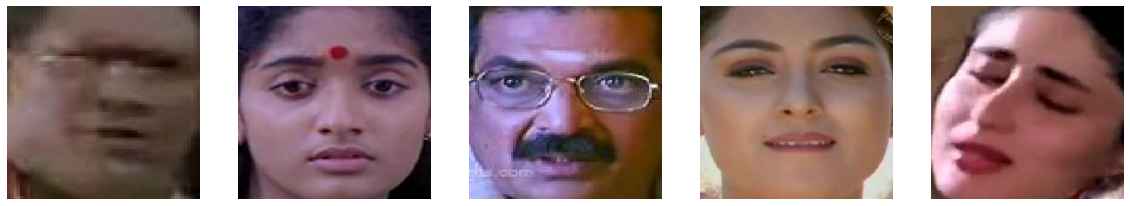

In [ ]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

2. Pre-processing the data

In [ ]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(12196, 150528)

In [ ]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

3. Creating training and validation set

In [ ]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [ ]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((8537, 150528), (8537,)), ((3659, 150528), (3659,)))

4. Defining the model architecture

In [ ]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

5. Compiling the model

In [ ]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

6. Setting up Early Stopping

In [ ]:
# importing module for early stopping
from keras.callbacks import EarlyStopping

In [ ]:
# setting up early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, mode='min')

7. Training the model using Early Stopping

In [ ]:
# training the model for 100 epochs

# defining the early stopping as callback using callbacks parameter of model.fit
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])

Epoch 1/100
67/67 [==============================] - 19s 271ms/step - loss: 0.6928 - accuracy: 0.5127 - val_loss: 0.6923 - val_accuracy: 0.5157
Epoch 2/100
67/67 [==============================] - 18s 267ms/step - loss: 0.6929 - accuracy: 0.5100 - val_loss: 0.6923 - val_accuracy: 0.5261
Epoch 3/100
67/67 [==============================] - 18s 267ms/step - loss: 0.6927 - accuracy: 0.5043 - val_loss: 0.6928 - val_accuracy: 0.5764
Epoch 4/100
67/67 [==============================] - 18s 267ms/step - loss: 0.6926 - accuracy: 0.5634 - val_loss: 0.6921 - val_accuracy: 0.6576
Epoch 5/100
67/67 [==============================] - 18s 267ms/step - loss: 0.6923 - accuracy: 0.6243 - val_loss: 0.6917 - val_accuracy: 0.6707
Epoch 6/100
67/67 [==============================] - 18s 267ms/step - loss: 0.6928 - accuracy: 0.5494 - val_loss: 0.6931 - val_accuracy: 0.4947


8. Evaluating model performance

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid,(model.predict(X_valid) > 0.5).astype("int32")[:, 0]), '%')

Accuracy on validation set: 0.4946706750478273 %


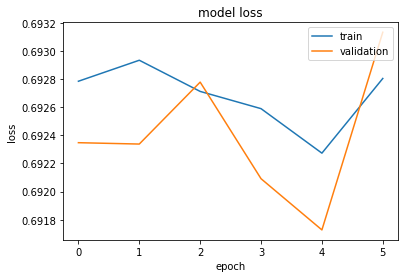

In [ ]:
 # summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Hyperparameter tuning for Early Stopping (Increasing the patience value)

In [ ]:
# defining and compiling the model

# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# increasing the patience and threshold value
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, mode='min')

In [ ]:
# training the model for 100 epochs
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])

Epoch 1/100
67/67 [==============================] - 19s 269ms/step - loss: 0.7127 - accuracy: 0.5022 - val_loss: 0.6960 - val_accuracy: 0.5157
Epoch 2/100
67/67 [==============================] - 18s 267ms/step - loss: 0.6961 - accuracy: 0.5022 - val_loss: 0.6928 - val_accuracy: 0.5157
Epoch 3/100
67/67 [==============================] - 18s 267ms/step - loss: 0.6938 - accuracy: 0.5022 - val_loss: 0.6927 - val_accuracy: 0.5157
Epoch 4/100
67/67 [==============================] - 18s 268ms/step - loss: 0.6933 - accuracy: 0.5022 - val_loss: 0.6928 - val_accuracy: 0.5157
Epoch 5/100
67/67 [==============================] - 18s 267ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6929 - val_accuracy: 0.5157
Epoch 6/100
67/67 [==============================] - 18s 267ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6929 - val_accuracy: 0.5157
Epoch 7/100
67/67 [==============================] - 18s 267ms/step - loss: 0.6932 - accuracy: 0.4929 - val_loss: 0.6929 - val_accuracy:

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, (model.predict(X_valid) > 0.5).astype("int32")[:, 0]), '%')

Accuracy on validation set: 0.5157146761410222 %


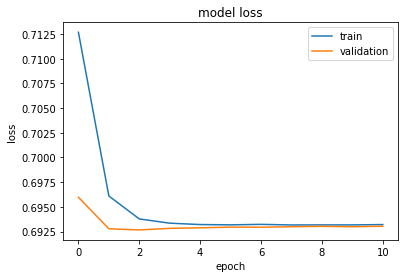

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Steps to solve Emergency vs Non-Emergency vehicle classification problem using Dropout
1. Loading the dataset
2. Pre-processing the data
3. Creating training and validation set
4. Defining the model architecture
* Adding dropout layer(s)
5. Compiling the model
6. Training the model using Dropout
7. Evaluating model performance

4. Defining the model architecture
Adding dropout layer(s)

In [ ]:
# importing the dropout layer
from keras.layers import Dropout

In [ ]:
# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

5. Compiling the model

In [ ]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

6. Training the model using Dropout

In [ ]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
67/67 [==============================] - 19s 271ms/step - loss: 0.7466 - accuracy: 0.4948 - val_loss: 0.6929 - val_accuracy: 0.5149
Epoch 2/100
67/67 [==============================] - 18s 268ms/step - loss: 0.7410 - accuracy: 0.5061 - val_loss: 0.6929 - val_accuracy: 0.5157
Epoch 3/100
67/67 [==============================] - 18s 269ms/step - loss: 0.7454 - accuracy: 0.4920 - val_loss: 0.6924 - val_accuracy: 0.5157
Epoch 4/100
67/67 [==============================] - 18s 269ms/step - loss: 0.7373 - accuracy: 0.5107 - val_loss: 0.6928 - val_accuracy: 0.5157
Epoch 5/100
67/67 [==============================] - 18s 270ms/step - loss: 0.7392 - accuracy: 0.5008 - val_loss: 0.6928 - val_accuracy: 0.5157
Epoch 6/100
67/67 [==============================] - 18s 269ms/step - loss: 0.7412 - accuracy: 0.5080 - val_loss: 0.6928 - val_accuracy: 0.5157
Epoch 7/100
67/67 [==============================] - 18s 269ms/step - loss: 0.7419 - accuracy: 0.4998 - val_loss: 0.6929 - val_accuracy:

7. Evaluating model performance

In [ ]:
predictions = (model.predict(X_valid) > 0.5).astype("int32")

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, predictions[:, 0]), '%')

Accuracy on validation set: 0.5159879748565182 %


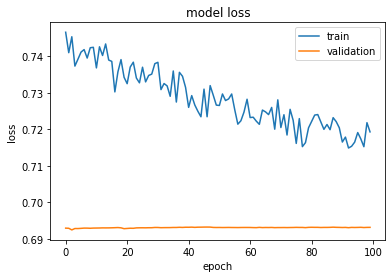

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Gradient Clipping in Keras
1. Loading the dataset
2. Pre-processing the data
3. Creating training and validation set
4. Defining the model architecture
5. Compiling the model
* Define clipvalue while defining the optimizer
6. Training the model
7. Evaluating model performance

3. Creating training and validation set

In [ ]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [ ]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((8537, 150528), (8537,)), ((3659, 150528), (3659,)))

4. Defining the model architecture

In [ ]:
# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

5. Compiling the model

In [ ]:
# defining the adam optimizer and setting the learning rate as 10^-5 and adding clip value to clip the gradients
adam = Adam(lr=1e-5, clipvalue=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

6. Training the model

In [ ]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
67/67 [==============================] - 19s 281ms/step - loss: 0.7008 - accuracy: 0.5022 - val_loss: 0.6937 - val_accuracy: 0.5157
Epoch 2/100
67/67 [==============================] - 19s 277ms/step - loss: 0.6962 - accuracy: 0.5022 - val_loss: 0.6934 - val_accuracy: 0.5157
Epoch 3/100
67/67 [==============================] - 18s 276ms/step - loss: 0.6945 - accuracy: 0.5022 - val_loss: 0.6920 - val_accuracy: 0.5157
Epoch 4/100
67/67 [==============================] - 18s 276ms/step - loss: 0.6923 - accuracy: 0.5022 - val_loss: 0.6926 - val_accuracy: 0.5157
Epoch 5/100
67/67 [==============================] - 18s 276ms/step - loss: 0.6933 - accuracy: 0.5022 - val_loss: 0.6927 - val_accuracy: 0.5157
Epoch 6/100
67/67 [==============================] - 18s 277ms/step - loss: 0.6922 - accuracy: 0.5022 - val_loss: 0.6929 - val_accuracy: 0.5157
Epoch 7/100
67/67 [==============================] - 18s 276ms/step - loss: 0.6931 - accuracy: 0.5022 - val_loss: 0.6929 - val_accuracy:

7. Evaluating model performance

In [ ]:
predictions = (model.predict(X_valid) > 0.5).astype("int32")

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, predictions[:, 0]), '%')

Accuracy on validation set: 0.5157146761410222 %


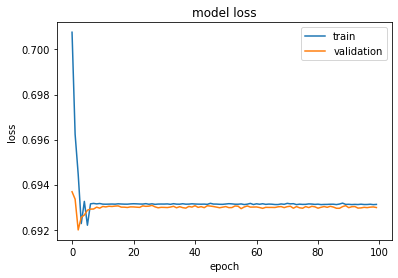

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Steps to solve Emergency vs Non-Emergency vehicle classification problem using Batch Normalization
1. Loading the dataset
2. Pre-processing the data
3. Creating training and validation set
4. Defining the model architecture
* Adding batch normalization layer(s)
5. Compiling the model
6. Training the model
7. Evaluating model performance

In [ ]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from tensorflow.keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/My\ Drive/train_G.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/5250.jpg         
  inflating: images/5251.jpg         
  inflating: images/5252.jpg         
  inflating: images/5253.jpg         
  inflating: images/5254.jpg         
  inflating: images/5255.jpg         
  inflating: images/5256.jpg         
  inflating: images/5257.jpg         
  inflating: images/5258.jpg         
  inflating: images/5259.jpg         
  inflating: images/5260.jpg         
  inflating: images/5261.jpg         
  inflating: images/5262.jpg         
  inflating: images/5263.jpg         
  inflating: images/5264.jpg         
  inflating: images/5265.jpg         
  inflating: images/5266.jpg         
  inflating: images/5267.jpg         
  inflating: images/5268.jpg         
  inflating: images/5269.jpg         
  inflating: images/5270.jpg         
  inflating: images/5271.jpg         
  inflating: images/5272.jpg         
  inflating: images/5273.jpg         
  inflating: images/5274.jpg         

In [ ]:
data_1 = pd.read_csv('train.csv')

In [ ]:
data_2 = pd.read_csv('test_G.csv')

In [ ]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [ ]:
# distribution of classes in the dataset
data_1['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [ ]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data_1.image_names:
    # loading the image using its name
    img = plt.imread('images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data_1['class'].values
#y = data_1.class.values

In [ ]:
# shape of the image
X.shape

(12196, 224, 224, 3)

2. Pre-processing the data

In [ ]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(12196, 150528)

In [ ]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [ ]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [ ]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((8537, 150528), (8537,)), ((3659, 150528), (3659,)))

4. Defining the model architecture
Without Batch Normalization

In [ ]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


5. Compiling the model

In [ ]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

Training the model

In [ ]:
# training the model for 50 epochs

model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 [==============================] - 19s 270ms/step - loss: 0.6963 - accuracy: 0.5010 - val_loss: 0.6928 - val_accuracy: 0.5171
Epoch 2/50
67/67 [==============================] - 18s 267ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6929 - val_accuracy: 0.5157
Epoch 3/50
67/67 [==============================] - 18s 267ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6929 - val_accuracy: 0.5157
Epoch 4/50
67/67 [==============================] - 19s 278ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6929 - val_accuracy: 0.5157
Epoch 5/50
67/67 [==============================] - 18s 267ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6929 - val_accuracy: 0.5157
Epoch 6/50
67/67 [==============================] - 18s 267ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6930 - val_accuracy: 0.5157
Epoch 7/50
67/67 [==============================] - 18s 267ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6930 - val_accuracy: 0.5157

Evaluating model performance

In [ ]:
predictions = (model.predict(X_valid) > 0.5).astype("int32")

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, predictions[:, 0]), '%')

Accuracy on validation set: 0.5157146761410222 %


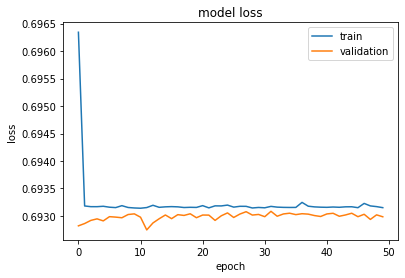

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Defining the model architecture
With Batch Normalization

In [ ]:
# importing batch normalization layer
from keras.layers import BatchNormalization

In [ ]:
# defining the model architecture and adding batch normalization layers
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,501
Trainable params: 15,063,301
Non-trainable params: 200
_________________________________________________________________


Compiling the model

In [ ]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

Training the model

In [ ]:
# training the model for 50 epochs using Batch Normalization

model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 [==============================] - 19s 271ms/step - loss: 0.6973 - accuracy: 0.5097 - val_loss: 0.7367 - val_accuracy: 0.4843
Epoch 2/50
67/67 [==============================] - 18s 267ms/step - loss: 0.6931 - accuracy: 0.5022 - val_loss: 0.7170 - val_accuracy: 0.4843
Epoch 3/50
67/67 [==============================] - 18s 268ms/step - loss: 0.6931 - accuracy: 0.5022 - val_loss: 0.7063 - val_accuracy: 0.4843
Epoch 4/50
67/67 [==============================] - 18s 268ms/step - loss: 0.6931 - accuracy: 0.5022 - val_loss: 0.7007 - val_accuracy: 0.4843
Epoch 5/50
67/67 [==============================] - 18s 268ms/step - loss: 0.6931 - accuracy: 0.5022 - val_loss: 0.6975 - val_accuracy: 0.4843
Epoch 6/50
67/67 [==============================] - 18s 268ms/step - loss: 0.6931 - accuracy: 0.5022 - val_loss: 0.6957 - val_accuracy: 0.4843
Epoch 7/50
67/67 [==============================] - 18s 268ms/step - loss: 0.6931 - accuracy: 0.5022 - val_loss: 0.6947 - val_accuracy: 0.4843

Evaluating model performance

In [ ]:
predictions = (model.predict(X_valid) > 0.5).astype("int32")

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, predictions[:, 0]), '%')

Accuracy on validation set: 0.4842853238589779 %


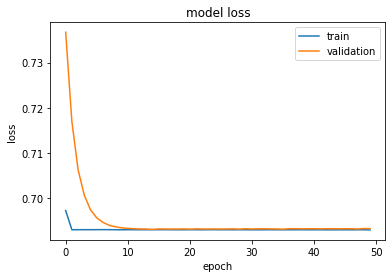

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Image Augmentation Techniques
Image Rotation
Image Shifting
Image Flipping
Image Noising
Image Blurring

In [ ]:
# importing libraries
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

1. Image Rotation

Original Image


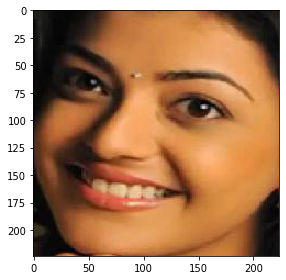

In [ ]:
# reading the image
image = imread('/content/images/1000.jpg')
print('Original Image')
#show original image
imshow(image)

Rotated Image


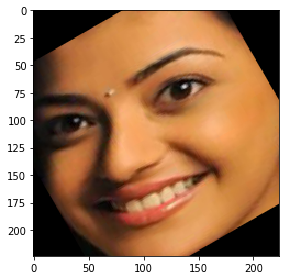

In [ ]:
#import required libraries
from skimage.transform import rotate

#rotating the image by 30 degrees
rotated = rotate(image,angle=30)
#plot the rotated image
print('Rotated Image')
imshow(rotated)

2. Image Shifting

Text(0.5, 1.0, 'Original Image')

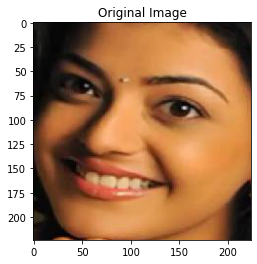

In [ ]:
#read the image
image = imread('/content/images/1000.jpg')

plt.imshow(image)
plt.title('Original Image')

Text(0.5, 1.0, 'Normal Shift')

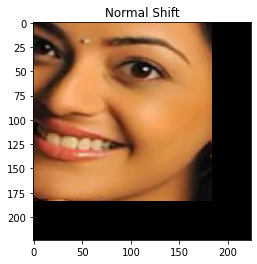

In [ ]:
#apply shift operation
from skimage.transform import AffineTransform, warp
transform = AffineTransform(translation=(40,40))
Shift = warp(image,transform)

plt.imshow(Shift)
plt.title('Normal Shift')

Text(0.5, 1.0, 'Wrap Shift')

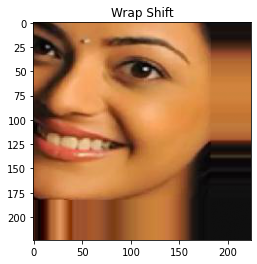

In [ ]:
# filling the black portion of image
wrapShift = warp(image,transform,mode='edge')
plt.imshow(wrapShift)
plt.title('Wrap Shift')

3. Image Flipping

Text(0.5, 1.0, 'Original Image')

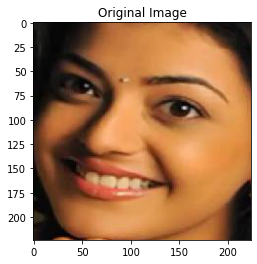

In [ ]:
#reading the image
image = imread('/content/images/1000.jpg')

plt.imshow(image)
plt.title('Original Image')

Text(0.5, 1.0, 'Left to Right Flipped')

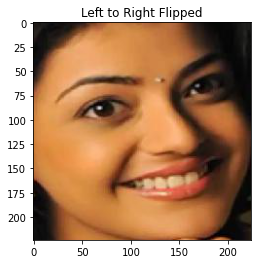

In [ ]:
#flip image left-to-right
flipLR = np.fliplr(image)

plt.imshow(flipLR)
plt.title('Left to Right Flipped')

Text(0.5, 1.0, 'Up Down Flipped')

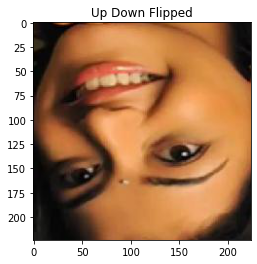

In [ ]:
#flip image up-to-down
flipUD = np.flipud(image)

plt.imshow(flipUD)
plt.title('Up Down Flipped')

4. Image Noising

Text(0.5, 1.0, 'Original Image')

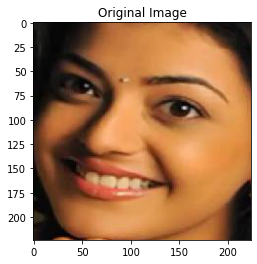

In [ ]:
#read the image
image = imread('/content/images/1000.jpg')

plt.imshow(image)
plt.title('Original Image')

Text(0.5, 1.0, 'Random Noise')

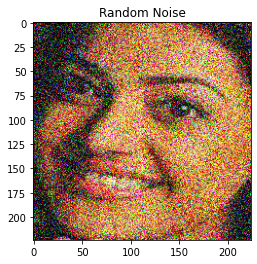

In [ ]:
# importing library first
from skimage.util import random_noise
#add random noise to the image
noisyRandom = random_noise(image,var=0.1)

plt.imshow(noisyRandom)
plt.title('Random Noise')

Text(0.5, 1.0, 'Gaussian Noise')

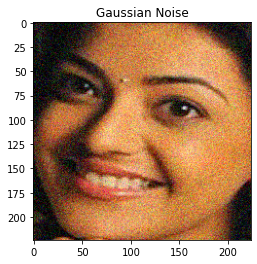

In [ ]:
#add gaussian noise to the image
noisyGaussian = random_noise(image,mode='gaussian')

plt.imshow(noisyGaussian)
plt.title('Gaussian Noise')

5. Image Blurring

Text(0.5, 1.0, 'Original Image')

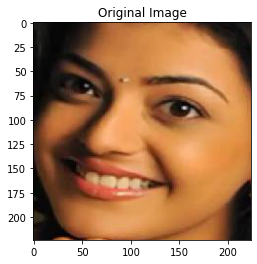

In [ ]:
#read the image
image = imread('/content/images/1000.jpg')

plt.imshow(image)
plt.title('Original Image')

Text(0.5, 1.0, 'Blurred Image')

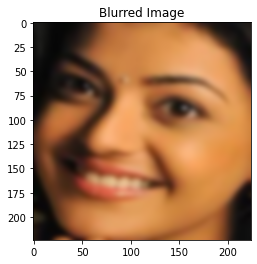

In [ ]:
#import required libraries
from skimage.filters import gaussian

#blur the image
blurred = gaussian(image,sigma=2.5,multichannel=True)

plt.imshow(blurred)
plt.title('Blurred Image')